# Overall price 

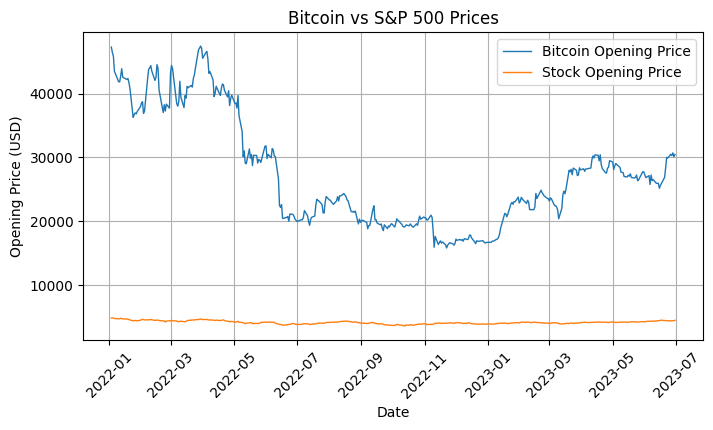

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

prices = pd.read_csv('./Processed/combined_prices.csv')

prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.sort_values('Date')
prices.set_index('Date', inplace=True)


plt.figure(figsize=(8, 4)) 
plt.plot(prices.index, prices['Open_B'], label='Bitcoin Opening Price', linewidth=1)
plt.plot(prices.index, prices['Open_S'], label='Stock Opening Price', linewidth=1)

plt.title('Bitcoin vs S&P 500 Prices')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')

plt.xticks(rotation=45)

plt.grid(True)

plt.legend()  
plt.show()

Epoch 1/30


/Users/joaomarujo/Documents/StockBTC-Sentiment-Price/.venv310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1436 - val_loss: 0.0348
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - val_loss: 0.0045
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - val_loss: 0.0036
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0047
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - val_loss: 0.0026
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0066
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 13/30
8/8 ━━━━━━━

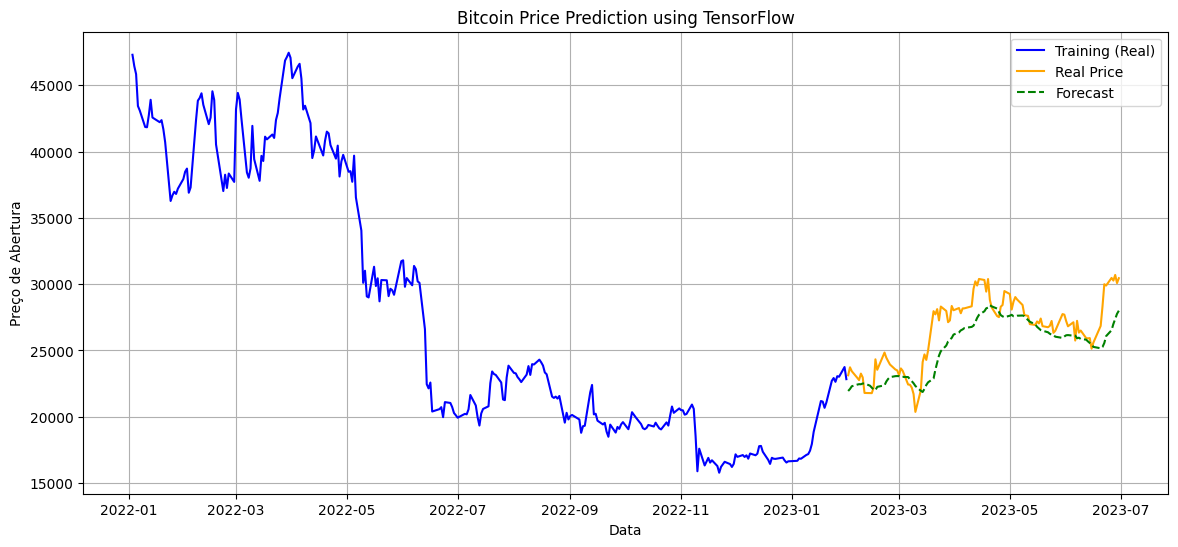

<bound method NDFrame.tail of           Date   Open_B    Scaled
0   2022-01-03  47293.9  0.995103
1   2022-01-04  46435.7  0.968007
2   2022-01-05  45833.1  0.948981
3   2022-01-06  43431.6  0.873158
4   2022-01-07  43097.9  0.862622
..         ...      ...       ...
370 2023-06-26  30466.3  0.463801
371 2023-06-27  30267.0  0.457509
372 2023-06-28  30691.9  0.470924
373 2023-06-29  30077.3  0.451519
374 2023-06-30  30445.7  0.463151

[375 rows x 3 columns]>

In [49]:
prices.reset_index(inplace=True)
prices = prices[['Date', 'Open_B']].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices[['Open_B']])
prices['Scaled'] = scaled

def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(prices['Scaled'].values, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(14, 6))
plt.plot(prices['Date'].iloc[:len(X_train) + window_size],
         scaler.inverse_transform(prices['Scaled'].values[:len(X_train) + window_size].reshape(-1, 1)), 
         label='Training (Real)', color='blue'
         )
plt.plot(prices['Date'].iloc[-len(y_test_inv):], y_test_inv.ravel(), label='Real Price', color='orange')
plt.plot(prices['Date'].iloc[-len(y_pred_inv):], y_pred_inv.ravel(), label='Forecast', color='green', linestyle='dashed')
plt.title('Bitcoin Price Prediction using TensorFlow')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.legend()
plt.grid()
plt.show()
prices.tail


Epoch 1/30


/Users/joaomarujo/Documents/StockBTC-Sentiment-Price/.venv310/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3572 - val_loss: 0.3565
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2488 - val_loss: 0.2189
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1374 - val_loss: 0.0711
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1206 - val_loss: 0.0976
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0938 - val_loss: 0.0907
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - val_loss: 0.0521
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0807 - val_loss: 0.0655
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0763 - val_loss: 0.0706
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - val_loss: 0.0516
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0715 - val_loss: 0.0588
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - val_loss: 0.0601
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - val_loss: 0.0567
Epoch 13/30
8/8 ━━━━━━

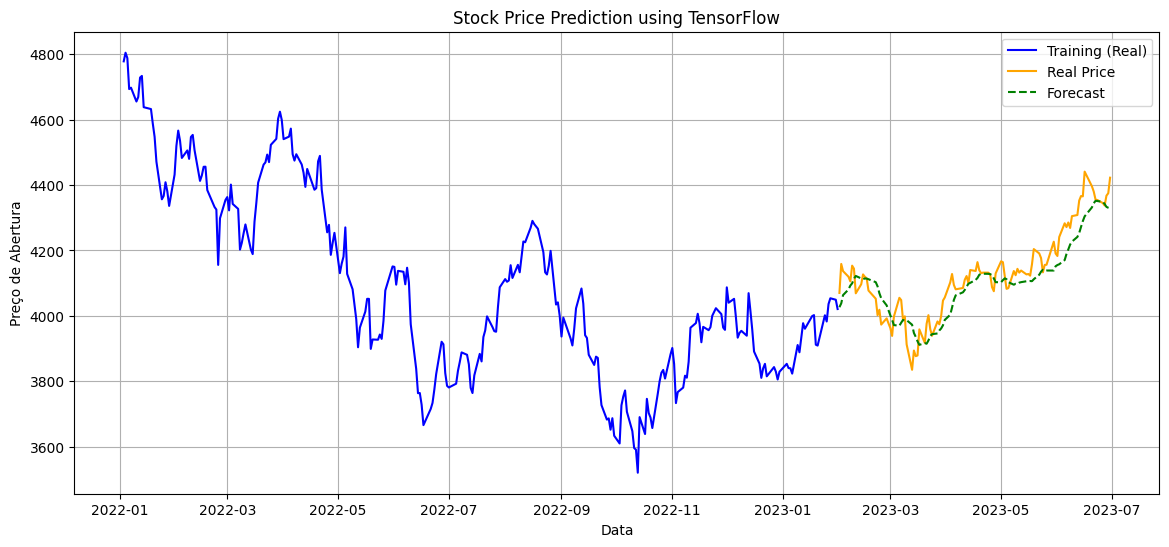

In [50]:
df = pd.read_csv('./Processed/combined_prices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open_S']].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Open_S']])
df['Scaled'] = scaled

def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(df['Scaled'].values, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(14, 6))
plt.plot(df['Date'].iloc[:len(X_train) + window_size],
         scaler.inverse_transform(df['Scaled'].values[:len(X_train) + window_size].reshape(-1, 1)), 
         label='Training (Real)', color='blue'
         )
plt.plot(df['Date'].iloc[-len(y_test_inv):], y_test_inv.ravel(), label='Real Price', color='orange')
plt.plot(df['Date'].iloc[-len(y_pred_inv):], y_pred_inv.ravel(), label='Forecast', color='green', linestyle='dashed')
plt.title('Stock Price Prediction using TensorFlow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

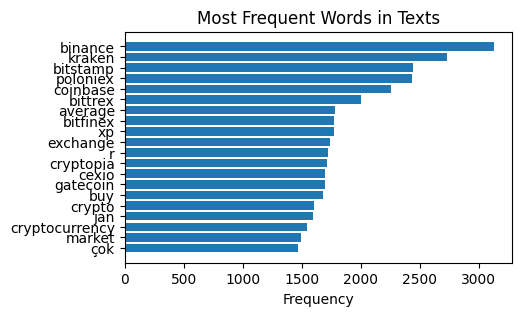

<bound method NDFrame.tail of             Date                                               body
0     2018-01-07                                                 []
1     2018-01-07      [eur, gbp, aud, nzd, cny, chf, sun, jan, jst]
2     2018-01-07  [saati, binance, borsasında, bandında, çok, yü...
3     2018-01-07                                         [bitflyer]
4     2018-01-07                                                 []
...          ...                                                ...
24795 2018-02-06  [not, die, come, strong, believer, dig, amid, ...
24796 2018-02-06  [снова, обвалился, за, популярную, криптовалют...
24797 2018-02-06  [sign, wcx, global, digital, currency, sign, e...
24798 2018-02-06  [sonunda, icx, ven, olacak, ve, ben, yaşımda, ...
24799 2018-02-06  [rival, network, visa, mastercard, work, sabot...

[24800 rows x 2 columns]>

In [51]:
from collections import Counter

visu_words = pd.read_pickle('visu_words.pkl')

word_counter = Counter()

for tokens in visu_words['body']:
    word_counter.update(tokens)

words, counts = zip(*word_counter.most_common(20))

plt.figure(figsize=(5, 3))
plt.barh(words[::-1], counts[::-1])
plt.xlabel('Frequency')
plt.title('Most Frequent Words in Texts')
plt.show()
visu_words.tail
